# HOPFIELD: A SIMPLE MODEL FOR MEMORY

### I'll try to store an image inside the pattern.  
Goals:  
- define a function that generates images  
- create several images as patterns and 1 as a new image similar to the one of the patterns  
- compare the accuracy between the new image and other images  
- retrieve the initial image from perturbed one

### Libraries and functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""
UTILITY FUNCTIONS
"""

def images (x: int, y: int) -> np.ndarray:
    '''' Creates matrices (and corresponding images) to memorize '''
    image=-np.ones((x,y))
    image[np.random.randint(0,y/2):np.random.randint(x/2,y),
    np.random.randint(0,y/2):np.random.randint(x/2,y)]=1
    return image


def change (image: np.ndarray, rate: float) -> np.ndarray:
    """ Changes a selected image to a certain extent (rate) 
        rate - fraction of changed sites
    """
    k=int(np.ceil(rate*N)) # absolute number of changed sites
    if k==N:
        starting_point_of_change=0
    else:
        starting_point_of_change=np.random.randint(0,N-k) #define random site to start changes
    
    change_matrix_1d=np.ones(N) 
    change_matrix_1d[starting_point_of_change:(starting_point_of_change+k)]=-1 #create an array full of 1 
                                                                                # with k sites of -1
    change_matrix=np.reshape(change_matrix_1d,(x,y)) #this is a matrix to change the image
    new_image=image*change_matrix 

    plt.imshow(new_image,cmap='binary')
    plt.show()
    return new_image 

def pattern_accuracy(state_1: np.ndarray, state_2: np.ndarray) -> float: 
    """ Computes an extent of similarity between two patterns and gives back a result
        from -1 = 100% different   to 1 = 100% same 
    """
    return (1/N)* np.dot(state_1,state_2)


def weight_matrix_image(patterns: np.ndarray) -> np.ndarray:
    """ Computes weight matrix of image patterns that are memorized """
    c = 1/N                                     
    W = np.zeros(shape = (N,N))
    for pattern in patterns:
        for i in range(N):
            for j in range(N):
                W[i,j] += c*(pattern[i]*pattern[j])
    np.fill_diagonal(W,0)
    return W 

def energy(state_pattern: np.ndarray, W: np.ndarray) -> float :
    """ Computes the energy of a given state """
    return -N * state_pattern @ W @ state_pattern



In [3]:
"""
DYNAMICS
"""
# evolution function

def evolution(initial_state: np.ndarray, W:np.ndarray, max_steps: int = 100) -> np.ndarray:
    """ Evolution function. Retrieves the initial image from the perturbed one """
    iteration = 0
    list_of_states = []
    list_of_energies = []

    energy_old = np.infty
    energy_new = energy(initial_state, W)

    current_state = initial_state
    # we keep running until we reach the lowest energy level
    while (energy_old > energy_new) and iteration < max_steps: 
        iteration += 1
        energy_old = energy_new
        list_of_energies.append(energy_new)
        list_of_states.append(np.copy(current_state))

        # do the dynamics
        current_state = np.sign(W @ current_state) 

        #calculate the new energy of the current state    
        energy_new = energy(current_state, W)

    final_state = current_state 
    return iteration, final_state, list_of_energies, list_of_states

### Rectangular images

In [4]:
#initial parameters

x = 10  #width of an image
y = 10  #height of an image
L = 10   #number of images/patterns
N = x*y # number of "neurons"

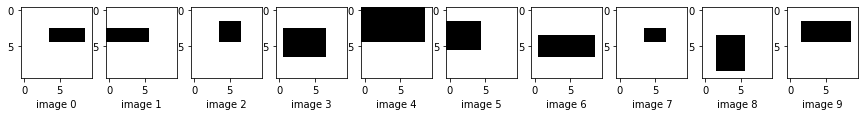

In [5]:
#create a set of images and show them

image_list=[]
fig, ax=plt.subplots(1,L, figsize=(15,5))
axes=ax.ravel()

for i in range (L):    
    image_list.append(images(x, y))
    axes[i].imshow(image_list[i],cmap='binary')
    axes[i].set_xlabel(f'image {i}')

plt.show()
    

In [6]:
what_to_change=np.random.randint(0,L) #which image to change - randomly chosen from set of images

changed image is number 7


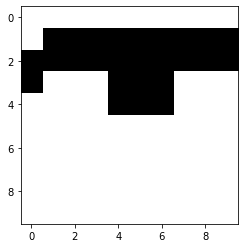

In [7]:
#let's create an image similar to 'image X' (previously randomly chosen) with 10% of changed sites (rate=0.1)
print(f'changed image is number {what_to_change}')
new_image=change(image_list[what_to_change],0.2)

In [8]:
#make an array of patterns from images (from 2D to 1D)
image_patterns=[]
#reshaping the stored patterns 
for i in image_list:  
    each_image_pattern = np.reshape(i,x*y)
    image_patterns.append(each_image_pattern)
    
#reshaping the initial state
new_image_pattern=np.reshape(new_image,x*y)

similarity between image 0 and new image is 0.52
similarity between image 1 and new image is 0.44
similarity between image 2 and new image is 0.66
similarity between image 3 and new image is 0.24
similarity between image 4 and new image is 0.54
similarity between image 5 and new image is 0.4
similarity between image 6 and new image is 0.12
similarity between image 7 and new image is 0.6
similarity between image 8 and new image is 0.16
similarity between image 9 and new image is 0.58
The most similar image is image 2


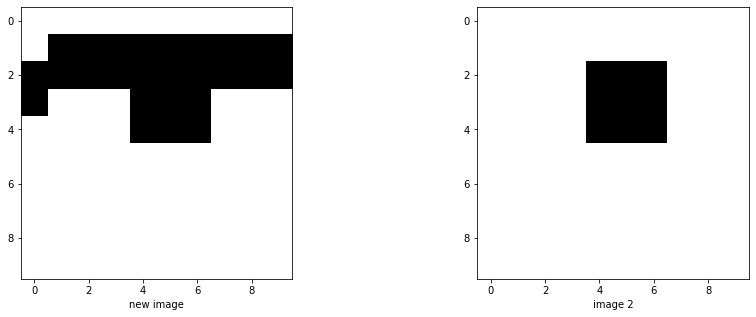

In [9]:
# now we can compare all the images in the set with our new image and find the most similar ones
# and show them

i=0
results=[]
for pat in image_patterns:          #if you prefer to avoid the counter i, you can use the function enumerate(image_patterns)                         
    similarity = pattern_accuracy(pat,new_image_pattern)   #computes similarity between patterns
    results.append(similarity)
    print(f'similarity between image {i} and new image is {similarity}')  
    i+=1
    
    
    
fig1, ax=plt.subplots(1,np.size(np.where(results==np.max(results)))+1,figsize=(15,5))
# plot with 1 row and number of columns that is equal to number of similar images
axes=ax.ravel()
a=0
axes[a].imshow(new_image,cmap='binary')
axes[a].set_xlabel(f'new image')
find_sim = False  # I can't see why you need this boolean variable...
for i in range (len(results)):
    if results[i]==np.max(results):
        print("The most similar image is image", i)
        a+=1
        axes[a].imshow(image_list[i],cmap='binary')
        axes[a].set_xlabel(f'image {i}')
        find_pat = True  #...nor this one
    
plt.show()

In [10]:
# compute weight matrix

W=weight_matrix_image(image_patterns)

number of iterations 3


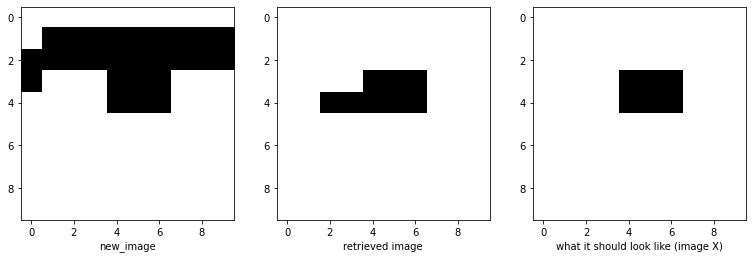

In [11]:
# retrieve the initial image and show it. we have to get back to initial image, which was 'image X'
# they must be the same, but they are not in most cases

final_state_pattern = evolution(new_image_pattern, W, max_steps=100)[1]
print('number of iterations',evolution(new_image_pattern, W, max_steps=100)[0])

fig3, ax=plt.subplots(1,3,figsize=(13,5))
axes=ax.ravel()
axes[1].imshow(np.reshape(final_state_pattern,(x,y)), cmap='binary')
axes[1].set_xlabel(f'retrieved image')
axes[2].imshow(image_list[what_to_change], cmap='binary')
axes[2].set_xlabel(f'what it should look like (image X)')
axes[0].imshow(new_image, cmap='binary')
axes[0].set_xlabel(f'new_image')
plt.show()

In [12]:
find_pat = False
for pat in enumerate(image_patterns):
    if pattern_accuracy(pat[1],final_state_pattern) == 1:
        print("The retrieved pattern is the number: ", pat[0])
        find_pat = True
        break  # if you find the pattern, no need to keep searching!
if not find_pat:
    print("No pattern retrieved :(")

No pattern retrieved :(


The code often fails, rarely retrieves images, no matter which `x`, `y`, `L` or `rate` parameters are
(but more successfull with small values of `L`)

Probably complicated due to the way the images were created  


_______

### Pixel-like images

Let's try to create random images, not easily distinguished by eye

In [13]:
#new parameters (actually the same as previously)
x=10
y=10
L=10 #number of images/patterns
N=x*y # number of "neurons"

In [14]:
# new necessary functions

# make a set of patterns
def random_patterns(x,y):
 
    patterns =[np.array([np.random.choice((-1, 1)) for _ in range(N)]) for _ in range(L)]
    return patterns
    
#choose one of the patterns randomly
which = np.random.randint(0,L)

#make a change in pattern
def random_change(set_of_random_patterns,rate):    
    #take an initial state near to a pattern
    initial_state = np.zeros(shape = (N,))

    print('Which pattern was modified?',which)
    #choose how many sites to change in the selected pattern
    how_many = int(np.ceil(rate*N))
    #choose randomly the index to flip
    index_modi = np.random.randint(1,N-1, (how_many,))
    #perturb the pattern in order to construct the initial state
    for i in range(N):
        if i in index_modi:
            initial_state[i] = -1*set_of_random_patterns[which][i]
        else:
            initial_state[i] = set_of_random_patterns[which][i]
#    print('Initial state', initial_state)
    return initial_state

In [15]:
# create set of L patterns with x*y size
random_patterns=random_patterns(x,y)

In [16]:
#new patter (20% of changed sites in this case)
initial_state=random_change(random_patterns,0.2)

Which pattern was modified? 6


In [17]:
#from 1D pattern to 2D image

set_of_images=[]
for i in random_patterns:  
    each_image=np.reshape(i,(x,y))
    set_of_images.append(each_image)
initial_state_image=np.reshape(initial_state,(x,y))

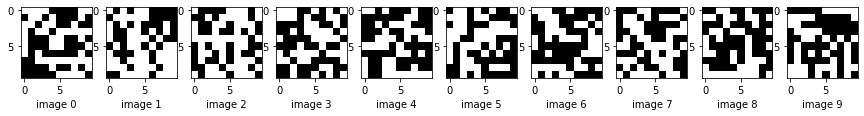

In [18]:
#created images from set of patterns
fig, ax=plt.subplots(1,L, figsize=(15,5))
axes=ax.ravel()

for i in range (L):    
    axes[i].imshow(set_of_images[i],cmap='binary')
    axes[i].set_xlabel(f'image {i}')
plt.show()

initial_state_image


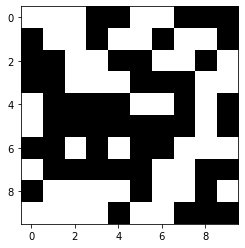

In [19]:
#show new image
print('initial_state_image')
plt.imshow(initial_state_image,cmap='binary')
plt.show()

similarity between image 0 and new image is 0.1
similarity between image 1 and new image is 0.0
similarity between image 2 and new image is 0.04
similarity between image 3 and new image is 0.14
similarity between image 4 and new image is -0.06
similarity between image 5 and new image is 0.16
similarity between image 6 and new image is 0.64
similarity between image 7 and new image is 0.08
similarity between image 8 and new image is 0.12
similarity between image 9 and new image is -0.06
The most similar image is image 6


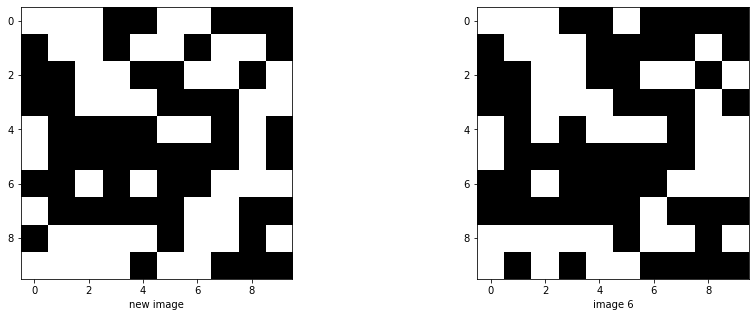

In [20]:
# now we can compare all the images in the set with our new image and find the most similar one

i=0
results=[]
for pat in random_patterns:
    similarity = pattern_accuracy(pat,initial_state)
    results.append(similarity)
    print(f'similarity between image {i} and new image is {similarity}')  
    i+=1
    

fig1, ax=plt.subplots(1,np.size(np.where(results==np.max(results)))+1,figsize=(15,5))
# plot with 1 row and number of columns that is equal to number of similar images
axes=ax.ravel()
a=0
axes[a].imshow(initial_state_image,cmap='binary')
axes[a].set_xlabel(f'new image')
find_sim = False
for i in range (len(results)):
    if results[i]==np.max(results):
        print("The most similar image is image", i)
        a+=1
        axes[a].imshow(set_of_images[i],cmap='binary')
        axes[a].set_xlabel(f'image {i}')
        find_pat = True  
plt.show()

In [21]:
# now let's try to go back to initial image from the changed one

W = weight_matrix_image(random_patterns)

number of iterations 3


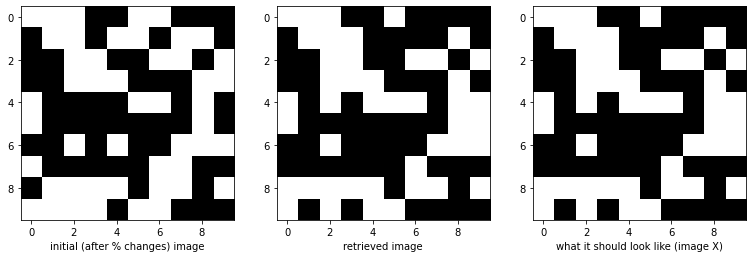

In [22]:
# retrieve the initial image and show it. we have to get back to initial image, which was 'image X'

final_state_pattern_random = evolution(initial_state, W, max_steps=100)[1]
print('number of iterations',evolution(initial_state, W, max_steps=100)[0])
fig3, ax=plt.subplots(1,3,figsize=(13,5))
axes=ax.ravel()
axes[1].imshow(np.reshape(final_state_pattern_random,(x,y)), cmap='binary')
axes[1].set_xlabel(f'retrieved image')
axes[0].imshow(initial_state_image, cmap='binary')
axes[0].set_xlabel(f'initial (after % changes) image')
axes[2].imshow(np.reshape(random_patterns[which],(x,y)), cmap='binary')
axes[2].set_xlabel(f'what it should look like (image X)')
plt.show()

In [23]:
find_pat = False
for pat in enumerate(random_patterns):
    if pattern_accuracy(pat[1],final_state_pattern_random) == 1:
        print("The retrieved pattern is the number: ", pat[0])
        find_pat = True
if not find_pat:
    print("No pattern retrieved :(")

The retrieved pattern is the number:  6


Works fine! Retrieves images, with parameters:  
`Number of Neurons N=100`, `Number of Patterns L=10` and `rate of change = 20%`   
Ratio L/N - 1 pattern per 10 neurons